# Модули:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи

Набор данных содержит около 10 лет с 2008 до 2018 ежедневных метеорологических наблюдений из разных мест по всей Австралии. Нужно предсказать, будет ли дождь завтра или нет. Правильные значения находятся в признаке RainTomorrow.

# 1. Прочитать данные

In [2]:
url = "https://raw.githubusercontent.com/Vladislavbul/Machine_learning/main/weatherAUS.csv"
data = pd.read_csv(url)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует определённому дню) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [5]:
data.shape

(145460, 23)

Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [6]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


А вот последние строки:

In [7]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Мы видим, что столбцы (признаки) имеют имена:
* Date - Дата наблюдения
* Location - Название места расположения метеостанции
* MinTemp - Минимальная температура
* MaxTemp - Максимальная температура
* Rainfall - Количество осадков, за сутки в мм
* Evaporation - Испарения за сутки
* Sunshine - Количество солнечных часов за сутки
* WindGustDir - Направление самого сильного порыва ветра за сутки
* WindGustSpeed - Скорость (км/ч) самого сильного порыва ветра за сутки
* WindDir9am - Направление ветра в 9 утра дня
* WindDir3pm - Направление ветра в 3 часа дня
* WindSpeed9am - Средняя скорость ветра (км/ч) в 9 утра дня
* WindSpeed3pm - Средняя скорость ветра (км/ч) в 3 часа дня
* Humidity9am - Влажность воздуха (в процентах) в 9 утра дня
* Humidity3pm - Влажность (в процентах) в 3 часа дня
* Pressure9am - Среднее значение атмосферного давления (гПа) над уровнем моря в 9 утра дня
* Pressure3pm - Среднее значение атмосферного давления (гПа) над уровнем моря в 3 часа дня
* Cloud9am - Часть неба, скрытая облаками, в 9 утра. Этот показатель измеряется в октантах. Данный признак означает, сколько октантов (небо разделяется на 8 частей) неба скрыто облаками. Показатель 0 указывает на полностью чистое небо, в то время как показатель 8 указывает на то, что оно полностью затянуто облаками.
* Cloud3pm - Часть неба, скрытая облаками (измеряется в октантах), в 3 часа дня
* Temp9am - Температура (градусы Цельсия) в 9 утра дня
* Temp3pm - Температура (градусы Цельсия) в 3 часа дня
* RainToday - Логическое значение: 1, если Осадки (мм) в течение 24 часов до 9 утра превышают 1 мм, в противном случае 0
* RainTomorrow - Целевая переменная. Будет ли завтра дождь?

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Признаки Location, WindGustDir, WindDir9am, WindDir3pm - номинальные 
(категориальные).

Заменим типы категориальных признаков с ***object*** на специальный предназначенный для хранения категориальных значений.

In [10]:
data['Location'] = data['Location'].astype('category')
data['Location'].dtype

CategoricalDtype(categories=['Adelaide', 'Albany', 'Albury', 'AliceSprings',
                  'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns',
                  'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin',
                  'GoldCoast', 'Hobart', 'Katherine', 'Launceston',
                  'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree',
                  'MountGambier', 'MountGinini', 'Newcastle', 'Nhil',
                  'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
                  'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond',
                  'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport',
                  'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga',
                  'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe',
                  'Wollongong', 'Woomera'],
, ordered=False)

In [11]:
data['WindDir3pm'] = data['WindDir3pm'].astype('category')
data['WindDir3pm'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [12]:
data['WindDir9am'] = data['WindDir9am'].astype('category')
data['WindDir9am'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [13]:
data['WindGustDir'] = data['WindGustDir'].astype('category')
data['WindGustDir'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           145460 non-null  object  
 1   Location       145460 non-null  category
 2   MinTemp        143975 non-null  float64 
 3   MaxTemp        144199 non-null  float64 
 4   Rainfall       142199 non-null  float64 
 5   Evaporation    82670 non-null   float64 
 6   Sunshine       75625 non-null   float64 
 7   WindGustDir    135134 non-null  category
 8   WindGustSpeed  135197 non-null  float64 
 9   WindDir9am     134894 non-null  category
 10  WindDir3pm     141232 non-null  category
 11  WindSpeed9am   143693 non-null  float64 
 12  WindSpeed3pm   142398 non-null  float64 
 13  Humidity9am    142806 non-null  float64 
 14  Humidity3pm    140953 non-null  float64 
 15  Pressure9am    130395 non-null  float64 
 16  Pressure3pm    130432 non-null  float64 
 17  Cloud9am  

# 2. Визуалиция данных и вычисление основных характеристик

Посмотрим средние значения, разброс, минимумы и максимумы по всем признакам:

In [15]:
data.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2015-04-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


Посмотрим средние значения, разброс, минимумы и максимумы по количественным признакам:

In [16]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Метрические характеристики числовых признаков:

* count - число значений
* mean - среднее арифметическое
* std - стандратное отклонение
* min - минимальное значение
* 25% - пертвый квартили
* 50% - второй квартиль или медиана
* 75% - третий квартиль
* max - максимальное значние

По данным характеристикам можно понять некоторые особенности нашего набора данных. Если среднее значение больше, чем медиана, значит данный признак принимает чаще меньшие значения, чем большие.

Посмотрим информация о категориальных:

In [17]:
data.describe(include=['category'])

,Location,WindGustDir,WindDir9am,WindDir3pm
count,145460,135134,134894,141232
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3436,9915,11758,10838


Для категориальных признаков мы получили такие характеристики, как:

* Count - Количество значений. Как можно заметить, пропущенных значений нет
* Unique - Количество уникальных значений
* Top - Наиболее встречающееся значение
* Freq - Частота наиболее встречающегося значения

Посмотрим матрицу корреляции.

In [18]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


Посмотрим на взаимосвязь между переменными.

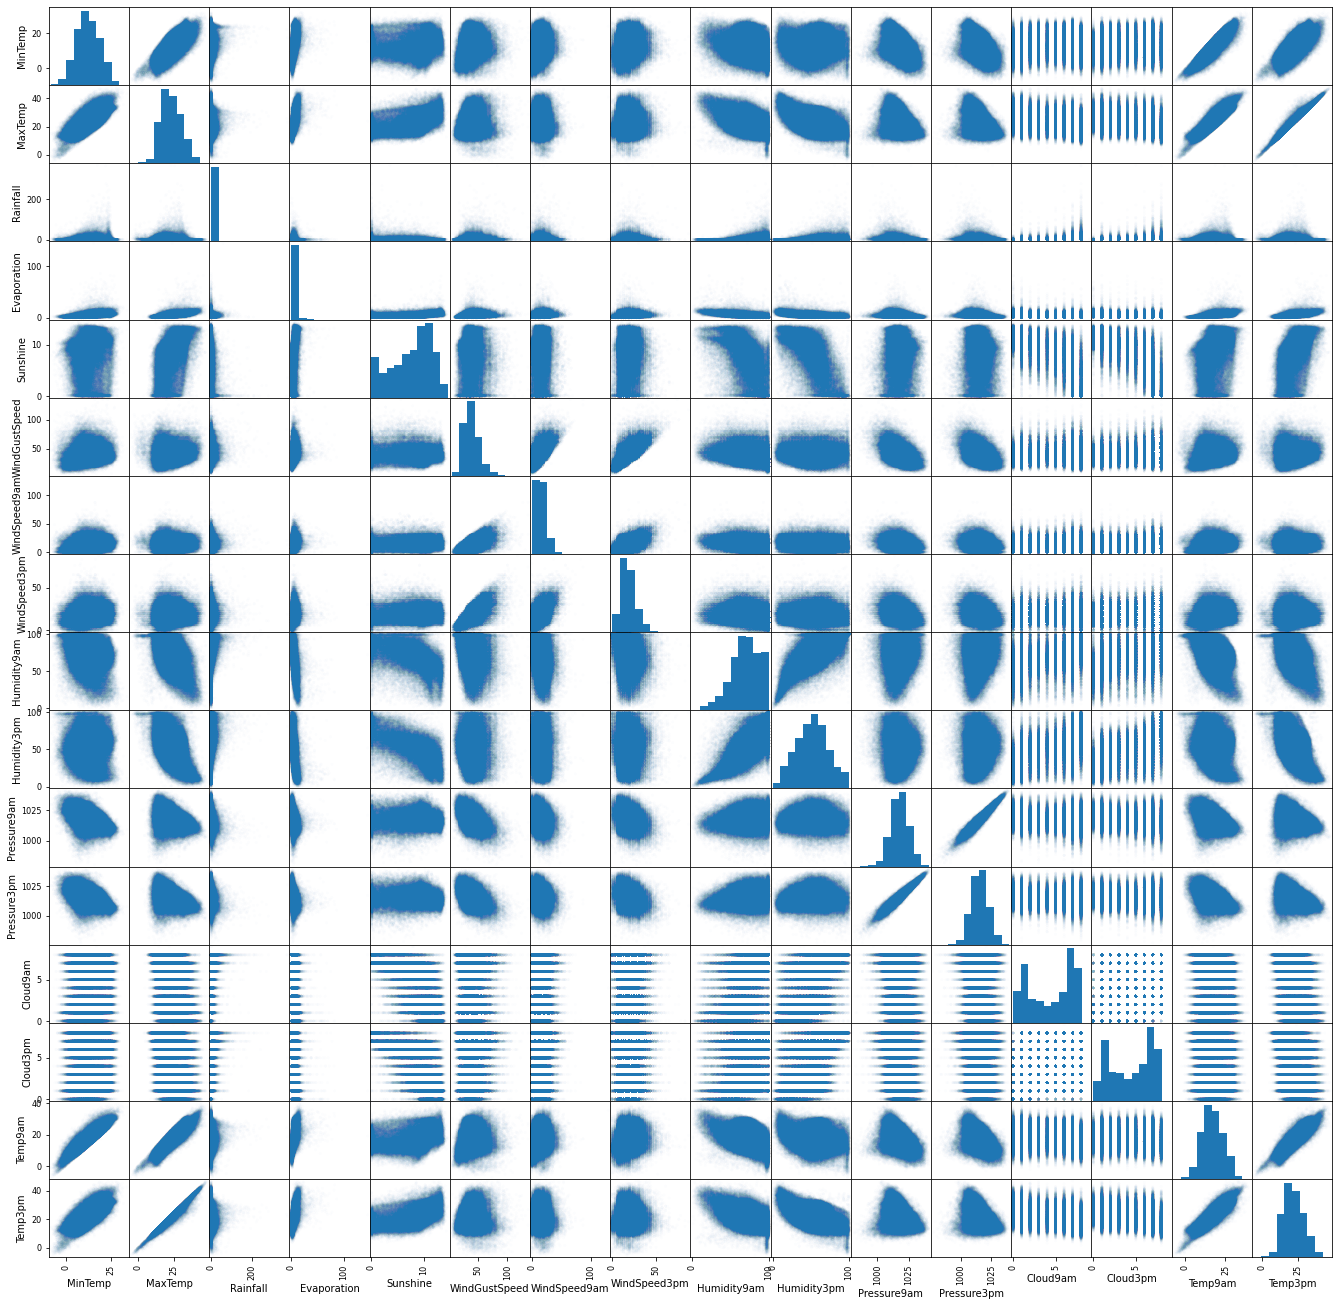

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.01, figsize = (23, 23))
pass

У некоторых признаков зависимость отсутствует, а некоторые признаки имеют линейную зависимость.

* Посмотрим зависимость количества солничных дней от облачности.

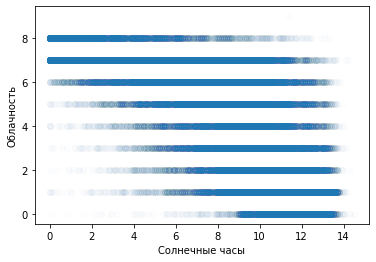

In [20]:
plt.scatter(data['Sunshine'], data['Cloud3pm'], alpha=0.01)
plt.xlabel('Солнечные часы')
plt.ylabel('Облачность')
pass

Из графика видно, что при облачности световой день меньше, а при солнечном дне, облачность минимальна.

* Посмотрим зависимость испарения от солнечных часов.

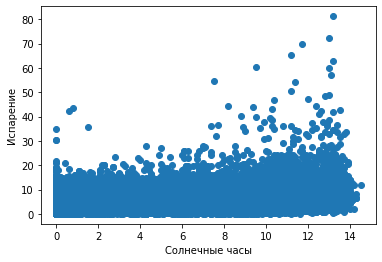

In [21]:
plt.scatter(data['Sunshine'], data['Evaporation'], alpha=1)
plt.xlabel('Солнечные часы')
plt.ylabel('Испарение')
pass

Из графика видно, что чем больше солнечных часов, тем выше испарение.

* Посмотрим зависимость вложности воздуха от осадков.

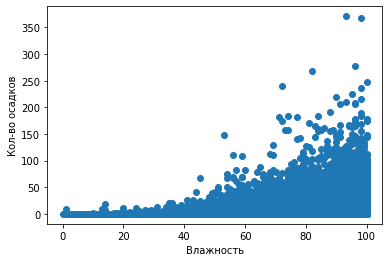

In [22]:
plt.scatter(data['Humidity9am'], data['Rainfall'], alpha=1)
plt.xlabel('Влажность')
plt.ylabel('Кол-во осадков')
pass

Из графика видно, что влажность повышается от размеров осадков.

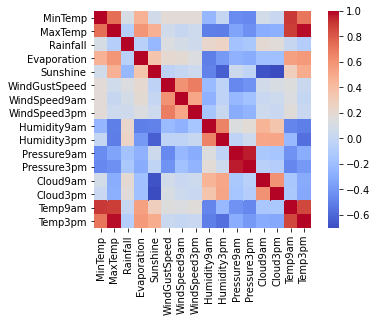

In [23]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [24]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(categorical_columns)

['Date', 'RainToday', 'RainTomorrow']


In [25]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(numerical_columns)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# 3. Обработка пропущенных значений

Пропущенные значения:

In [26]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [27]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [28]:
data['WindGustDir'].fillna(data['WindGustDir'].mode().iloc[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode().iloc[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode().iloc[0], inplace=True)
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

Удалим строки, в которых признаки RainTomorrow и RainToday имеют пропущенные значения:

In [29]:
data.dropna(axis=0, how='all', subset=['RainTomorrow'], inplace=True)
data.dropna(axis=0, how='all', subset=['RainToday'], inplace=True)
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [30]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.184209,23.233735,2.349974,5.187367,7.995657,39.907754,13.983074,18.637772,68.839474,51.462983,1017.649250,1015.252294,4.643788,4.698765,16.985729,21.682127
std,6.393235,7.106800,8.465173,3.196637,2.768186,13.133963,8.853265,8.718790,18.961051,20.547147,6.749208,6.682548,2.300772,2.123656,6.480890,6.873294
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [31]:
data.describe(include=['category'])

,Location,WindGustDir,WindDir9am,WindDir3pm
count,140787,140787,140787,140787
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3402,18859,20926,14248


# 4. Обработка категориальных признаков

In [32]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [33]:
data.drop(('Date'), axis = 1, inplace = True)

In [34]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count     140787
unique         2
top            0
freq      109332
Name: RainToday, dtype: int64

In [35]:
data.at[data['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
data.at[data['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
data['RainTomorrow'].describe()

count     140787
unique         2
top            0
freq      109586
Name: RainTomorrow, dtype: int64

In [36]:
data['RainTomorrow'] = data['RainTomorrow'].astype('float32')
data['RainToday'] = data['RainToday'].astype('float32')

In [37]:
data = pd.get_dummies(data)
data.shape

(140787, 115)

In [38]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0


# 5. Проведение нормализации

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

* приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
* стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [39]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,...,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05,1.407870e+05
mean,2.413942e-14,-1.784533e-14,-2.893009e-14,-1.007623e-12,-1.317383e-12,7.727519e-15,1.650623e-14,-1.559292e-14,-5.042197e-15,-6.357503e-15,...,-5.511218e-14,3.826334e-14,-8.627166e-15,-4.011301e-14,-7.278622e-15,-1.265774e-14,-7.169297e-14,2.298281e-14,-3.313125e-14,9.319123e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.235328e+00,-3.944635e+00,-2.776050e-01,-1.622758e+00,-2.888411e+00,-2.581685e+00,-1.579426e+00,-2.137656e+00,-3.630573e+00,-2.504629e+00,...,-2.399383e-01,-2.517969e-01,-2.688160e-01,-3.355546e-01,-2.619154e-01,-2.445557e-01,-2.629358e-01,-2.736752e-01,-2.544974e-01,-2.648912e-01
25%,-7.170407e-01,-7.505115e-01,-2.776050e-01,-3.714427e-01,7.381829e-02,-6.782229e-01,-7.887569e-01,-6.466232e-01,-6.244102e-01,-7.038925e-01,...,-2.399383e-01,-2.517969e-01,-2.688160e-01,-3.355546e-01,-2.619154e-01,-2.445557e-01,-2.629358e-01,-2.736752e-01,-2.544974e-01,-2.648912e-01
50%,-2.881319e-02,-8.917309e-02,-2.776050e-01,-1.211797e-01,1.460678e-01,-6.911503e-02,-1.110408e-01,4.154568e-02,6.120579e-02,2.613584e-02,...,-2.399383e-01,-2.517969e-01,-2.688160e-01,-3.355546e-01,-2.619154e-01,-2.445557e-01,-2.629358e-01,-2.736752e-01,-2.544974e-01,-2.648912e-01
75%,7.219804e-01,6.988046e-01,-1.831001e-01,6.651758e-02,2.544420e-01,4.638543e-01,5.666753e-01,6.150197e-01,7.468218e-01,6.588271e-01,...,-2.399383e-01,-2.517969e-01,-2.688160e-01,-3.355546e-01,-2.619154e-01,-2.445557e-01,-2.629358e-01,-2.736752e-01,-2.544974e-01,-2.648912e-01
max,3.396683e+00,3.498940e+00,4.354902e+01,4.373741e+01,2.349677e+00,7.240179e+00,1.310442e+01,7.840793e+00,1.643397e+00,2.362227e+00,...,4.167708e+00,3.971426e+00,3.719990e+00,2.980120e+00,3.818000e+00,4.089020e+00,3.803183e+00,3.653941e+00,3.929286e+00,3.775108e+00


In [40]:
data_stand

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.190168,-0.046960,-0.206726,-0.12118,0.146068,0.311577,0.679628,0.615020,0.113945,-1.433921,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,3.929286,-0.264891
1,-0.748324,0.262603,-0.277605,-0.12118,0.146068,0.311577,-1.127615,0.385630,-1.310026,-1.287915,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,3.775108
2,0.111961,0.347029,-0.277605,-0.12118,0.146068,0.463854,0.566675,0.844409,-1.626464,-1.044572,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,3.775108
3,-0.466776,0.670663,-0.277605,-0.12118,0.146068,-1.211192,-0.336946,-1.105402,-1.257287,-1.725932,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,-0.264891
4,0.831471,1.275717,-0.159474,-0.12118,0.146068,0.083162,-0.788757,0.156240,0.694082,-0.898567,...,-0.239938,3.971426,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,-0.264891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,-1.358344,-0.201741,-0.277605,-0.12118,0.146068,-0.678223,0.114865,-0.646623,-0.518931,-1.190578,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,-0.264891
145455,-1.467834,0.023395,-0.277605,-0.12118,0.146068,-0.678223,-0.111041,-0.876013,-0.940848,-1.336584,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,-0.264891
145456,-1.342702,0.290745,-0.277605,-0.12118,0.146068,-1.363469,-0.111041,-1.105402,-0.677150,-1.482589,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,-0.254497,-0.264891
145457,-1.061154,0.515881,-0.277605,-0.12118,0.146068,-0.221392,-0.562852,-1.105402,-0.835369,-1.336584,...,-0.239938,-0.251797,-0.268816,-0.335555,-0.261915,-0.244556,-0.262936,-0.273675,3.929286,-0.264891


In [41]:
data_stand['RainTomorrow'].astype('bool')
data_stand['RainToday'].astype('bool')
pass

# 6. Разбить данные на обучающую и тестовую выборки

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Для работы с моделями будут использоваться выбранные признаки.

In [43]:
X = data_stand.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(105590, 35197)

# 7. Запуск классификатора ближайших соседей

Запустим классификатор KNN с параметром по умолчанию:

In [45]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_train_predict = 100 * knn.score(X_train, y_train)
knn_test_predict = 100 * knn.score(X_test, y_test)

print("Accuracy. Train: {:.2f}%, Test: {:.2f}%".format(knn_train_predict, knn_test_predict))

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print("Error. Train {:.2f}, Test {:.2f}".format(err_train, err_test))

Accuracy. Train: 85.96%, Test: 81.28%
Error. Train 0.14, Test 0.19


15 соседей:

In [46]:
knn_15 = KNeighborsClassifier(n_neighbors=15)

knn_15.fit(X_train, y_train)
knn_train_predict = 100 * knn_15.score(X_train, y_train)
knn_test_predict = 100 * knn_15.score(X_test, y_test)

print("Accuracy. Train: {:.2f}%, Test: {:.2f}%".format(knn_train_predict, knn_test_predict))

err_train = np.mean(y_train != knn_15.predict(X_train))
err_test  = np.mean(y_test  != knn_15.predict(X_test))
print("Error. Train {:.2f}, Test {:.2f}".format(err_train, err_test))

Accuracy. Train: 83.21%, Test: 81.85%
Error. Train 0.17, Test 0.18


8 соседей:

In [47]:
knn_8 = KNeighborsClassifier(n_neighbors=8)

knn_8.fit(X_train, y_train)
knn_train_predict = 100 * knn_8.score(X_train, y_train)
knn_test_predict = 100 * knn_8.score(X_test, y_test)

print("Accuracy. Train: {:.2f}%, Test: {:.2f}%".format(knn_train_predict, knn_test_predict))

err_train = np.mean(y_train != knn_8.predict(X_train))
err_test  = np.mean(y_test  != knn_8.predict(X_test))
print("Error. Train {:.2f}, Test {:.2f}".format(err_train, err_test))

Accuracy. Train: 83.53%, Test: 81.44%
Error. Train 0.16, Test 0.19


4 соседа:

In [48]:
knn_4 = KNeighborsClassifier(n_neighbors=4)

knn_4.fit(X_train, y_train)
knn_train_predict = 100 * knn_4.score(X_train, y_train)
knn_test_predict = 100 * knn_4.score(X_test, y_test)

print("Accuracy. Train: {:.2f}%, Test: {:.2f}%".format(knn_train_predict, knn_test_predict))

err_train = np.mean(y_train != knn_4.predict(X_train))
err_test  = np.mean(y_test  != knn_4.predict(X_test))
print("Error. Train {:.2f}, Test {:.2f}".format(err_train, err_test))

Accuracy. Train: 85.06%, Test: 80.92%
Error. Train 0.15, Test 0.19


Как мы можем заметить, что при увеличении количества соседей, точность на обучаемой выборке почти не отличается, а при **n_neighbors = 3** точность ухудшается. Для тренировочной выборки при **n_neighbors = 3** значения лучше, чем в предыдущих.

# 8. Запуск других классификаторов. Сравнение результатов

In [51]:
from sklearn import ensemble
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf_train_predict = 100 * rf.score(X_train, y_train)
rf_test_predict = 100* rf.score(X_test, y_test)

print("Train: {:.2f}%, Test: {:.2f}%".format(rf_train_predict, rf_test_predict))

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test  != rf.predict(X_test))

print("Error. Train {:.2f}, Test {:.2f}".format(err_train, err_test))

Train: 100.00%, Test: 85.87%
Error. Train 0.00, Test 0.14


# 9. Вывод

Во время работы, установил, что алгоритм Рандомного дерева выполняет вычисления гораздо быстрее и точнее на двух выборках, чем алгоритм KNN. Алгоритм KNN проигрывает алгоритму RF. При изменении колличества соседей в алгоритме k-ближайших соседей, точность особо не изменяется.